In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

# Gathering data

In [3]:
# Open twitter data
twitter_df = pd.read_csv('twitter_archive_enhanced.csv')

In [4]:
twitter_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [5]:
# Download the image predictions
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [6]:
img_predictions = pd.read_table('image-predictions.tsv')

In [7]:
img_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [72]:
# Create twitter API object
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# Example
# tweet_id = '666020888022790149'
# api.get_status(tweet_id, tweet_mode='extended')

In [17]:
# Download json from twitter
def get_status(id):
    print(id)
    try:
        # Add json to the id_row
        json_dict = api.get_status(id, tweet_mode='extended')
        json_dict = json_dict._json
        # Create json.txt with all of them
        with open('tweet_json.txt', 'a') as outfile:
            json.dump(json_dict, outfile)
            outfile.write('\n')
    except:
        print('Json not available')
        # Add NaN to id_row without json (in case u want a column)
        json_dict = np.nan

twitter_df.tweet_id.apply(lambda id: get_status(id))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
Json not available
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199

821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477

765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903

708738143638450176
708711088997666817
708479650088034305
708469915515297792
708400866336894977
708356463048204288
708349470027751425
708149363256774660
708130923141795840
708119489313951744
708109389455101952
708026248782585858
707995814724026368
707983188426153984
707969809498152960
707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788291072
705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625

680440374763077632
680221482581123072
680206703334408192
680191257256136705
680176173301628928
680161097740095489
680145970311643136
680130881361686529
680115823365742593
680100725817409536
680085611152338944
680070545539371008
680055455951884288
679877062409191424
679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199

669923323644657664
669753178989142016
669749430875258880
669684865554620416
669683899023405056
669682095984410625
669680153564442624
669661792646373376
669625907762618368
669603084620980224
669597912108789760
669583744538451968
669573570759163904
669571471778410496
669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668967877119254528
668960084974809088
668955713004314625
668932921458302977
668902994700836864
668892474547511297
668872652652679168
668852170888998912
668826086256599040
668815180734

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2326    None
2327    None
2328    None
2329    None
2330    None
2331    None
2332    None
2333    None
2334    None
2335    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345    None
2346    None
2347    None
2348    None
2349    None
2350    None
2351    None
2352    None
2353    None
2354    None
2355    None
Name: tweet_id, Length: 2356, dtype: object

In [8]:
# Open JSON file resulted from the API search
twitter_json = pd.read_json('tweet_json.txt', lines=True)
# Filter just what is necessary
twitter_json_filtered = twitter_json[['id', 'retweet_count', 'favorite_count']]
twitter_json_filtered.columns = ['tweet_id', 'retweet_count', 'favorite_count']
twitter_json_filtered.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8372           38220
1  892177421306343426           6181           32769
2  891815181378084864           4090           24670
3  891689557279858688           8509           41544
4  891327558926688256           9217           39733

# Asses

In [9]:
twitter_df_cp = twitter_df.copy()
img_predictions_cp = img_predictions.copy()
twitter_json_filtered_cp = twitter_json_filtered.copy()

### - Visualization

In [10]:
twitter_df_cp.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [11]:
twitter_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
img_predictions_cp.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [13]:
img_predictions_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
twitter_json_filtered_cp.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8372           38220
1  892177421306343426           6181           32769
2  891815181378084864           4090           24670
3  891689557279858688           8509           41544
4  891327558926688256           9217           39733

In [15]:
twitter_json_filtered_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


### - Annotation

#### Quality

*twitter_df_cp*

* coluna `timestamp` passar para `datetime`;
* colunas `retweet_status_id`, `retweeted_status_user_id` e `retweeted_status_timestamp` indicando 181 retweets que devem ser ignorados (remover as colunas);
* colunas `in_reply_to_status_id` e `in_reply_to_user_id` indicam 78 respostas para serem ignorados (remover as colunas);
* coluna `name` com string **None** ao invés de `NaN`
* coluna `name` com string **a** ao invés de `NaN`;
* coluna `name` com string **an** ao invés de `NaN`;
* coluna `name` com string **the** ao invés de `NaN`;
* coluna `name` com string **this** ao invés de `NaN`;
* coluna `name` com string **quite** ao invés de `NaN`;
* coluna `doggo` com string **None** ao invés de `NaN`;
* coluna `floofer` com string **None** ao invés de `NaN`;
* coluna `pupper` com string **None** ao invés de `NaN`;
* coluna `puppo` com string **None** ao invés de `NaN`.


*img_predictions_cp*

* remover imagens duplicadas
* colunas `p1`, `p2` e `p3` algumas vezes começa com letra maiúscula outras não

#### Tidiness

* Remoção das colunas que remetiam a retweets e respostas, deixando apenas linhas dos tweets originais (remover: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`;
* Mergear tabela `twitter_df_cp` com `img_predictions_cp` com o nome de `twitter_archive_master` e assim deletar linhas sem imagens.
* Mergear o df `twitter_archive_master` com a tabela `twitter_json_filtered_cp` e assim obter as linhas que tem imagens e retweets/favoritos

> **PS.:** Depois de mergear as tabelas, alguns IDs não tinham classificação (`retweet_count` e `favorite_count`) então serão removidos da tabela final

# Clean

In [16]:
# Transform timestamp column to `datetime`
twitter_df_cp.timestamp = pd.to_datetime(twitter_df_cp.timestamp)
twitter_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [17]:
# Remove rows from retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp that are retweet
# so the columns isn't necessary anymore
twitter_df_cp = twitter_df_cp[twitter_df_cp.retweeted_status_id.isnull()]
twitter_df_cp.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)
twitter_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


In [18]:
# Remove replies
twitter_df_cp = twitter_df_cp[twitter_df_cp.in_reply_to_status_id.isnull()]
twitter_df_cp.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)
twitter_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


In [19]:
# Replace wrong strings to NaN
for i in ['None', 'a', 'an', 'the', 'quite', 'this']:
    twitter_df_cp.name.replace(i, np.nan, inplace=True)

In [20]:
# Replace None string on doggo, floofer, pupper and puppo columns
for i in ['doggo', 'floofer', 'pupper', 'puppo']:
    twitter_df_cp[i].replace('None', np.nan, inplace=True)

In [21]:
# Capitalize strings
for i in ['p1', 'p2', 'p3']:
    img_predictions_cp[i] = img_predictions_cp[i].str.capitalize()

In [22]:
# Remove duplicate images
img_predictions_cp.jpg_url.drop_duplicates(inplace=True)

In [23]:
# Merge twitter_df_cp with img_predictions_cp
twitter_archive_master = pd.merge(twitter_df_cp, img_predictions_cp, on='tweet_id', how='right')
# Merge twitter_archive_master with twitter_json_filtered_cp
twitter_archive_master = pd.merge(twitter_archive_master, twitter_json_filtered_cp, on='tweet_id', how='left')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id              2075 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1375 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null

In [24]:
# Remove rows without retweet and favorite count to generate the final file twitter_archive_master.csv
twitter_archive_master = twitter_archive_master[~twitter_archive_master.retweet_count.isnull()]
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2073
Data columns (total 25 columns):
tweet_id              2068 non-null int64
timestamp             1970 non-null datetime64[ns]
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
name                  1374 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
jpg_url               2068 non-null object
img_num               2068 non-null int64
p1                    2068 non-null object
p1_conf               2068 non-null float64
p1_dog                2068 non-null bool
p2                    2068 non-null object
p2_conf               2068 non-null float64
p2_dog                2068 non-null bool
p3                    2068 non-null

In [76]:
# Generate last file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Insights

In [74]:
# Some IDs from img_predictions_cp wasn't in twitter_df_cp, 
# so the favorite_count and retweet_count isn'nt available for those data.
# Knowing that we can download it now to update our data, how many IDs 
# were lost at first?

def att_status(id):
    try:
        # Add json to the id_row
        att_json_dict = api.get_status(id, tweet_mode='extended')
        # Create json.txt with all of them
        with open('att_tweet_json.txt', 'a') as att_outfile:
            json.dump(att_json_dict._json, att_outfile)
            att_outfile.write('\n')
    except:
        # Add NaN to id_row without json (in case u want a column)
        att_json_dict = np.nan

img_id_no_classification = img_predictions_cp[~img_predictions_cp.tweet_id.isin(twitter_df_cp.tweet_id)]
img_id_no_classification.tweet_id.apply(lambda id: att_status(id))
# Open the data and count it
att_twitter_json = pd.read_json('att_tweet_json.txt', lines=True)
len(att_twitter_json)

98

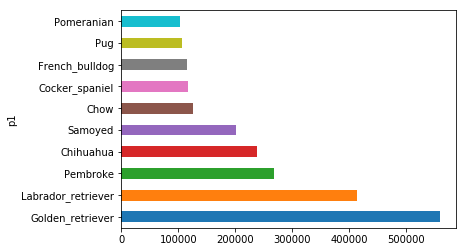

In [46]:
# Which predicted dog breed had more retweets?
%matplotlib inline
dogs_breed_retweets = twitter_archive_master.groupby('p1')['retweet_count'].agg('sum').sort_values(ascending=False)
dogs_breed_retweets.head(10).plot.barh()

In [64]:
# Wich dog had more favorite count?
favorite_dog = twitter_archive_master[~twitter_archive_master.name.isnull()]
favorite_dog = favorite_dog[favorite_dog.favorite_count == favorite_dog.favorite_count.max()][['name', 'p1', 'favorite_count']]
favorite_dog

name         p1  favorite_count
397  Stephan  Chihuahua        127650.0

In [69]:
# Which dog's names are more common?
%matplotlib inline
common_names = twitter_archive_master[~twitter_archive_master.name.isnull()]
common_names.name.value_counts().head(10)

Lucy       10
Charlie    10
Cooper     10
Oliver     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64